In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, classification_report)


In [17]:
df = pd.read_csv('yield_df.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  28242 non-null  int64  
 1   Unnamed: 0    28242 non-null  int64  
 2   Area          28242 non-null  object 
 3   Item          28242 non-null  object 
 4   Year          28242 non-null  int64  
 5   Yield         28242 non-null  int64  
 6   Avg Rainfall  28242 non-null  int64  
 7   Pesticides    28242 non-null  float64
 8   Temperature   28242 non-null  float64
 9   k_labels      28242 non-null  int64  
 10  Cluster       28242 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 2.4+ MB


In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


In [23]:
df.shape

(28242, 11)

In [28]:
X =  df.drop(columns= ['Item'])
y = df['Item']

In [30]:
X.head(1)

,Unnamed: 0.1,Unnamed: 0,Area,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,0,Albania,1990,36613,1485,121.0,16.37,1,1


In [34]:
# one.hot enconding
X = pd.get_dummies(X,drop_first=True)
X.head(3)

,Unnamed: 0.1,Unnamed: 0,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster,Area_Algeria,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,0,0,1990,36613,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1990,66667,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1990,23333,1485,121.0,16.37,1,1,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Must standardize your data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Explore the prepared data...
X_train

array([[-1.0166499 , -1.0166499 , -0.22349899, ..., -0.07782018,
        -0.07814846, -0.0816746 ],
       [ 1.52454173,  1.52454173, -1.49753342, ..., -0.07782018,
        -0.07814846, -0.0816746 ],
       [-0.32712896, -0.32712896, -0.9312959 , ..., -0.07782018,
        -0.07814846, -0.0816746 ],
       ...,
       [-1.62627611, -1.62627611, -1.49753342, ..., -0.07782018,
        -0.07814846, -0.0816746 ],
       [ 0.2038279 ,  0.2038279 , -0.78973651, ..., -0.07782018,
        -0.07814846, -0.0816746 ],
       [ 1.16685351,  1.16685351, -0.36505837, ..., -0.07782018,
        -0.07814846, -0.0816746 ]])

In [42]:
y_train

5835                 Soybeans
26573                   Wheat
11462                    Rice
21931                Soybeans
10239                   Maize
                 ...         
21575                    Rice
5390     Plantains and others
860                  Potatoes
15795          Sweet potatoes
23654          Sweet potatoes
Name: Item, Length: 19769, dtype: object

In [44]:
(df['Item'].unique())


array(['Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [91]:
md1 = LogisticRegression(max_iter= 1000)
md1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Metrics for Classification

In [49]:
# probability  scores...
# I do this first as it's kinda my 'thing'-many don't use probability scoring in their pipelines
y_proba = md1.predict_proba(X_test)
y_proba[0:5]

array([[5.11137001e-08, 4.11844959e-01, 3.10103705e-08, 1.33587940e-05,
        2.66752781e-01, 4.51727841e-02, 2.64160910e-03, 1.52858186e-03,
        2.72045128e-01, 7.17040857e-07],
       [1.88174475e-02, 2.78632448e-01, 5.35685290e-08, 1.68975979e-02,
        3.03182685e-01, 1.16082958e-01, 3.96485068e-02, 4.25211456e-02,
        1.84216352e-01, 8.04584976e-07],
       [1.50950191e-09, 2.23821016e-01, 9.30934407e-10, 3.47167017e-07,
        6.57812912e-02, 2.20100918e-01, 4.71562711e-02, 7.69456437e-05,
        4.43063173e-01, 3.52261540e-08],
       [3.57116208e-01, 8.03986710e-08, 2.38664914e-01, 3.30497259e-01,
        1.39867745e-05, 9.53375790e-15, 3.99951638e-19, 1.33156098e-04,
        3.51289349e-11, 7.35743961e-02],
       [2.81592967e-01, 2.50441421e-02, 7.84243798e-07, 2.92334476e-01,
        1.10353093e-01, 1.72047892e-04, 4.83074716e-06, 2.88272568e-01,
        2.21910850e-03, 5.98219066e-06]])

In [51]:
y_pred = md1.predict(X_test)
y_pred

array(['Maize', 'Rice', 'Wheat', ..., 'Rice', 'Maize', 'Soybeans'],
      dtype=object)

In [55]:
# bring in just the probability of y_pred
res = pd.DataFrame({'y_true': y_test, 
                    'y_pred' : y_pred, 
                    'proba': [max(proba) for proba in y_proba]})
res['match'] = np.where(res['y_true'] ==res['y_pred'], 1,0)
res

,y_true,y_pred,proba,match
25564,Rice,Maize,0.411845,0
18113,Wheat,Rice,0.303183,0
25607,Sorghum,Wheat,0.443063,0
6815,Potatoes,Cassava,0.357116,0
18144,Sweet potatoes,Potatoes,0.292334,0
...,...,...,...,...
6674,Rice,Rice,0.434507,1
8786,Sorghum,Wheat,0.396344,0
9527,Wheat,Rice,0.213850,0
18956,Maize,Maize,0.554518,1


In [57]:
res['match']==0

25564     True
18113     True
25607     True
6815      True
18144     True
         ...  
6674     False
8786      True
9527      True
18956    False
4271      True
Name: match, Length: 8473, dtype: bool

In [59]:
res[res['match']==0]

,y_true,y_pred,proba,match
25564,Rice,Maize,0.411845,0
18113,Wheat,Rice,0.303183,0
25607,Sorghum,Wheat,0.443063,0
6815,Potatoes,Cassava,0.357116,0
18144,Sweet potatoes,Potatoes,0.292334,0
...,...,...,...,...
5446,Wheat,Maize,0.245323,0
11264,Potatoes,Cassava,0.441552,0
8786,Sorghum,Wheat,0.396344,0
9527,Wheat,Rice,0.213850,0


## Accuracy

The ratio of correctly predicted intances to the total instances

In [62]:
# assigning y_test to variable y_true to help with clarity while learning
y_true = y_test

In [64]:
y_pred = md1.predict(X_test)
accuracy = accuracy_score(y_true,y_pred)
print(f"Accuracy of the logistic regression model :{accuracy:.2f}")

Accuracy of the logistic regression model :0.45


## Precision

The ratio of correctly predicted positive observations to the total predicted positives.


In [67]:
precision = precision_score(y_true,y_pred, average='macro')
precision

0.37883821729148154

## Recall (Sensitivity)

The ratio of correctly predicted positive observations to all oberservations in the actual class

In [70]:
recall= recall_score(y_true,y_pred, average ='macro') # weighted
recall
# 0.9814814814814815
# 0.99

0.3962919370229757

## F1 Score

The weighted average of Precision and Recall


In [73]:
f1 = f1_score(y_true,y_pred, average='macro') # weighted
f1

0.3808873131120968

## Classification Report

A comprehensive report showing precision, recall, F1 score and support for each class.

In [76]:
report = classification_report(y_true, y_pred)
print(report)

                      precision    recall  f1-score   support

             Cassava       0.21      0.14      0.17       625
               Maize       0.36      0.28      0.32      1247
Plantains and others       0.21      0.13      0.16       164
            Potatoes       0.67      0.72      0.70      1308
                Rice       0.51      0.67      0.58       971
             Sorghum       0.29      0.24      0.26       902
            Soybeans       0.48      0.70      0.57       995
      Sweet potatoes       0.54      0.58      0.56       868
               Wheat       0.31      0.23      0.27      1156
                Yams       0.21      0.27      0.24       237

            accuracy                           0.45      8473
           macro avg       0.38      0.40      0.38      8473
        weighted avg       0.43      0.45      0.43      8473



## Confusion Matrix

A table used to describe the performance of a classification model.

In [79]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 85,   0,  39, 267,  22,   1,   4, 163,   0,  44],
       [  0, 354,   0,  10, 284, 227,  74,  26, 266,   6],
       [ 22,   2,  21,  42,   5,   0,   0,  26,   0,  46],
       [214,  13,  12, 946,  11,   4,   0,  90,   0,  18],
       [  0, 178,   0,   2, 647,  28,   9,  33,  57,  17],
       [  0,  82,   0,   0,  32, 215, 369,   6, 198,   0],
       [  0,  60,   0,   0,  26, 142, 695,   0,  71,   1],
       [ 59,  22,  16,  91,  44,   5,   0, 507,  16, 108],
       [  1, 269,   0,   1, 195, 108, 301,  10, 271,   0],
       [ 21,   0,  14,  44,  10,   0,   0,  84,   0,  64]], dtype=int64)

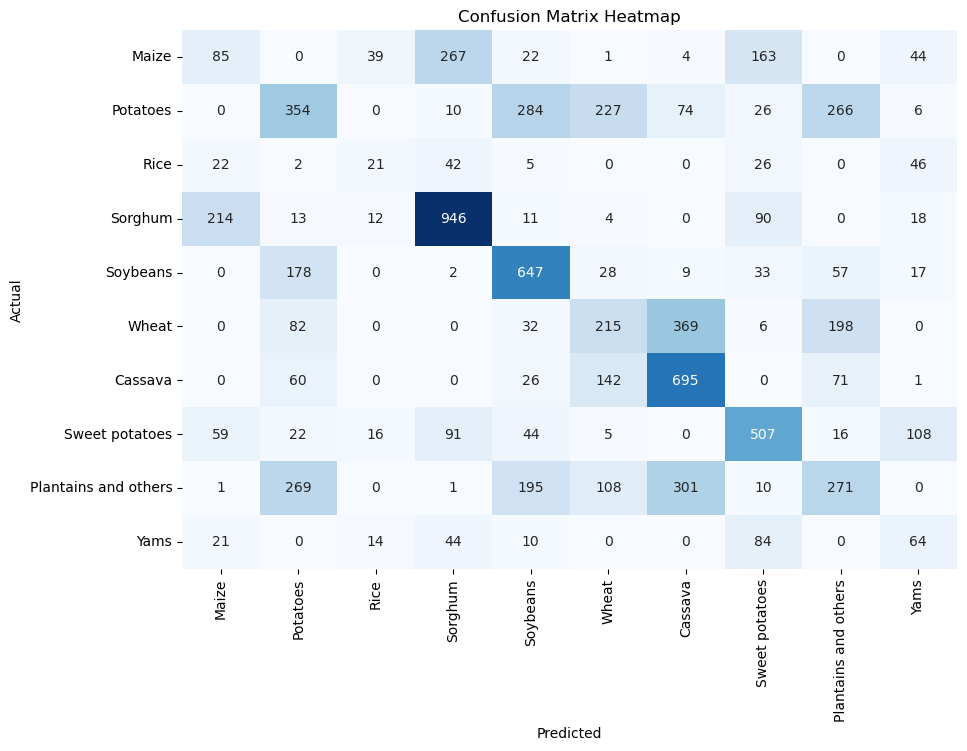

In [81]:
class_labels = ['Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'] 

plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# **Findings and Summary**

## **Findings**
- The **Logistic Regression model** achieved a reasonable accuracy **45%**, showing that crop classification is feasible using agricultural features.
- Some crops had **overlapping feature distributions**, making classification more challenging.
- Standardization improved the model's convergence and predictive performance.
- Precision, recall, and F1 scores vary across different classes, indicating that the model performs better for some crops than others
- The confusion matrix shows that the model struggles to correctly classify certain crops, such as Cassava and Yams, while performing better for others like Potatoes.

## **Summary**
The **Logistic Regression classification model** successfully predicted crop types based on key agricultural variables. These insights are valuable for:

- **Agricultural Decision-Making**: Helping farmers understand which crops align best with their environmental conditions.
- **Sustainable Farming Practices**: Identifying which crops require specific farming techniques for optimal growth.
- **Risk Assessment**: Providing a foundation for weather-index insurance by classifying crops vulnerable to climate conditions.

